## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk. mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [12]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Random state seed
rseed = 42

## Load and explore data

In [14]:
# Import the dataset
country_df = pd.read_csv("Country-data.csv")

display(country_df.head())

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [15]:
# Check the shape
display(country_df.shape)

(167, 10)

In [16]:
# Check datatypes & counts
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [17]:
# Get descriptive statistics
display(country_df.describe())

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [18]:
# Identify any missing data
display(country_df.isna().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Preprocessing and Feature Selection

In [19]:
# Drop any non-numeric features (columns)
country_df = country_df.drop(columns=['country'])
display(country_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


None

<Axes: >

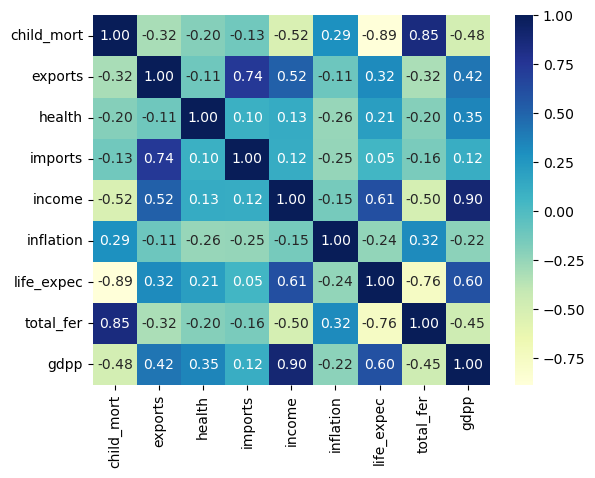

In [20]:
# Correlation map of features to explore relationships between features
corr_matrix = country_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")

High positive correlation between child mortality and total fertility, exports and imports, income and gdpp

High negative correlation between child mortality and life expectancy, total fertility and life expectancy

### Deep dive on child mortality

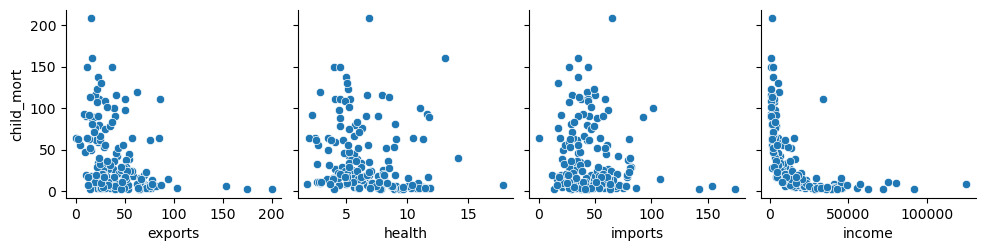

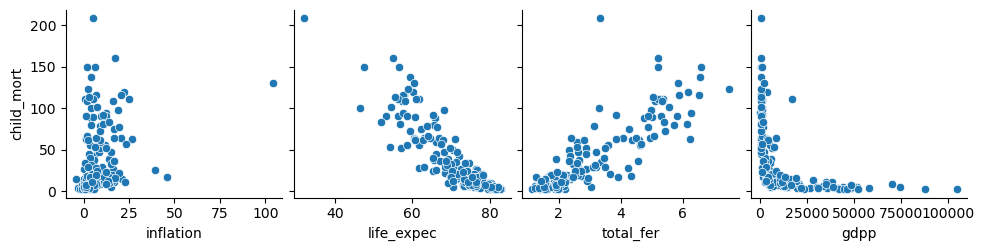

In [21]:
# Explore the continuous independent features against child_mort using scatter plots.
independent_features = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec',  'total_fer', 'gdpp']

sns.pairplot(data=country_df, 
             y_vars=['child_mort'], 
             x_vars=independent_features[:4], 
             kind='scatter'
             )

sns.pairplot(data=country_df, 
             y_vars=['child_mort'], 
             x_vars=independent_features[4:], 
             kind='scatter'
             )

Verifying correlation matrix to reveal that child mortality shows a strong negative correlation with life expectancy and strong positive correlation with total fertility.

### GDPP

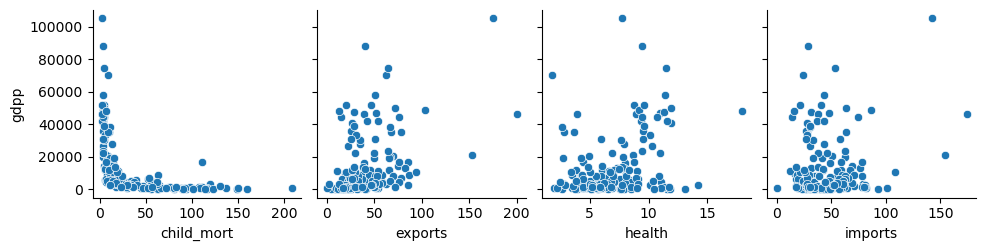

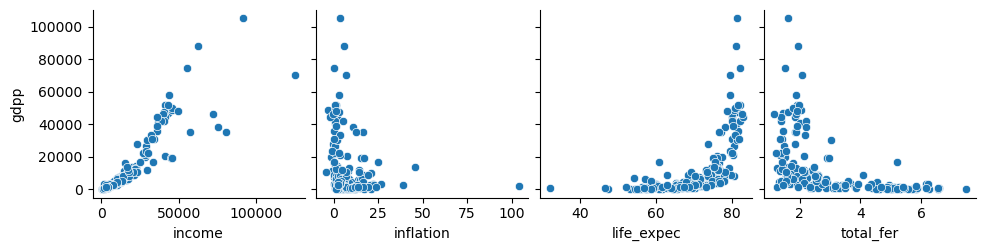

In [22]:
# Explore the continuous independent features against gdpp using scatter plots.
independent_features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec',  'total_fer']

sns.pairplot(data=country_df, 
             y_vars=['gdpp'], 
             x_vars=independent_features[:4], 
             kind='scatter'
             )

sns.pairplot(data=country_df, 
             y_vars=['gdpp'], 
             x_vars=independent_features[4:], 
             kind='scatter'
             )

A strong linear correlation is seen between income and gdpp

### Scaling the Data

In [23]:
# Normalise the data using MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(country_df)
df_scaled = pd.DataFrame(df_scaled, columns=country_df.columns)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

c:\Users\Ilana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ilana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ilana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ilana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

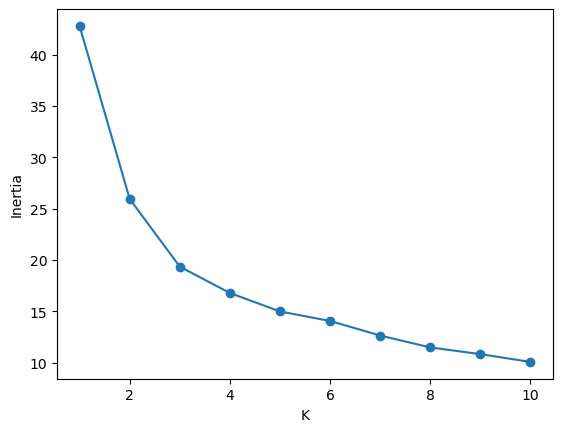

In [24]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset
elbow_Kmeans(df_scaled)

The elbow method indicates that the optimum number of clusters is 3.

c:\Users\Ilana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ilana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ilana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ilana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

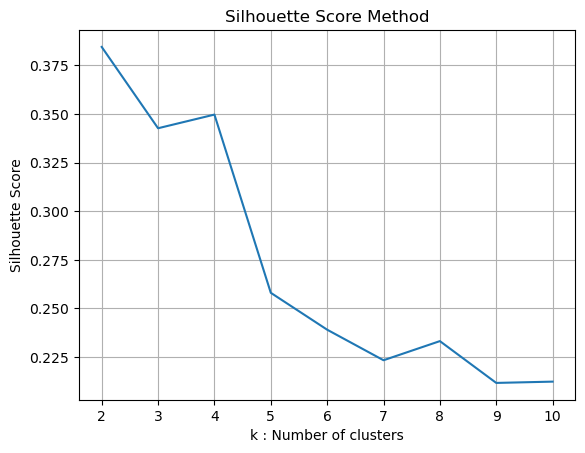

In [25]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.

* The elbow curve starts to curve around K 3 to 5 clusters which indicates that the inertia starts to slow around this point and could be an optimal number of clusters although the lowest inertia level is 10. The lowest inertia could indicate potential overfitting though. 
* The silhouette score doesn't show much variation by cluster (0.225-0.375). However, the silhouette score does suggest that there is better cohesion and less separation at 2 clusters
* As a result 3 seems to be a good starting point for the k value

## Fitting a K-Means Model with the selected K value

In [37]:
# Remember to set the random_state to rseed
kmeans = KMeans(n_clusters=3, random_state=rseed)

kmeans.fit(df_scaled)

c:\Users\Ilana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [38]:
# Count the number of records in each cluster
from collections import Counter
print(Counter(kmeans.labels_))

Counter({0: 87, 1: 46, 2: 34})


In [39]:
# Check model performance with the silhouette coefficient
score = round(silhouette_score(df_scaled, kmeans.labels_, metric='euclidean'), 2)
print(f"The silhouette score for the k-means model with k value 3 is: {score}")

The silhouette score for the k-means model with k value 3 is: 0.65


In [45]:
# Add the cluster label column to the original dataframe
df_scaled['assigned_cluster'] = kmeans.labels_

display(df_scaled.head())

display(df_scaled.groupby(['assigned_cluster']).mean().round(2))

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,assigned_cluster
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,1
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,0
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,0
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,1
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,0


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
assigned_cluster,,,,,,,,,
0,0.10,0.20,0.28,0.27,0.10,0.11,0.80,0.18,0.06
1,0.44,0.15,0.28,0.25,0.02,0.15,0.54,0.62,0.01
2,0.01,0.29,0.44,0.29,0.37,0.06,0.95,0.09,0.42


The three clusters show distinct differences by variables, particularly income and fertility rates with cluster 0 having moderate incomme and moderate total fertility, cluster 1 having very low income and higher total fertility rates while cluster 2 has the highest income with low total fertility but also the highest life expectancy and health, suggesting this cluster is the most developed.

## Visualisation of clusters
### GDPP versus Child Mortality

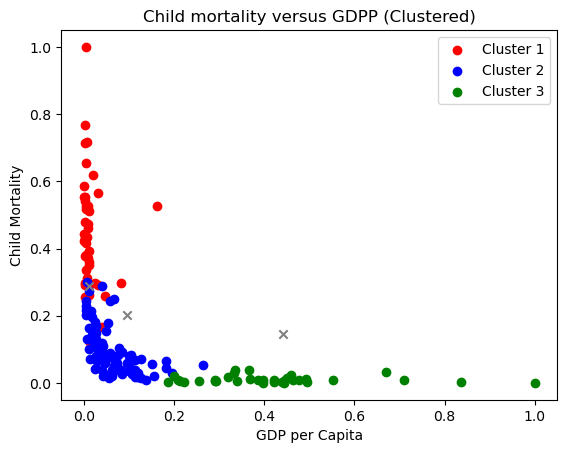

In [31]:
# Define colors for clusters
colours = 'rbgcmy'

# Visualisation of clusters: child mortality vs gdpp
for c in range(kmeans.n_clusters):
    plt.scatter(
        x = df_scaled.loc[df_scaled['assigned_cluster'] == c, 'gdpp'],
        y = df_scaled.loc[df_scaled['assigned_cluster'] == c, 'child_mort'],
        c=colours[c],
        label='Cluster {}'.format(c+1)
        )

    plt.scatter(
        kmeans.cluster_centers_[c, 0], 
        kmeans.cluster_centers_[c, 1], 
        marker='x', 
        c = 'grey'
    )


plt.title("Child mortality versus GDPP (Clustered)")
plt.xlabel("GDP per Capita")
plt.ylabel("Child Mortality")
plt.legend()


### GDPP versus Inflation

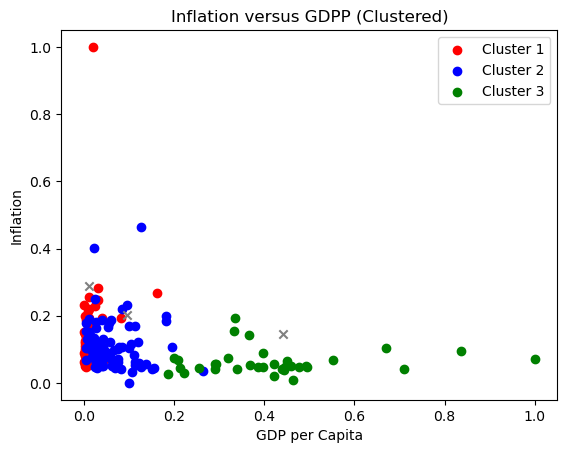

In [32]:
# Define colors for clusters
colours = 'rbgcmy'

# Visualisation of clusters: inflation vs gdpp
for c in range(kmeans.n_clusters):
    plt.scatter(
        x = df_scaled.loc[df_scaled['assigned_cluster'] == c, 'gdpp'],
        y = df_scaled.loc[df_scaled['assigned_cluster'] == c, 'inflation'],
        c=colours[c],
        label='Cluster {}'.format(c+1)
        )

    plt.scatter(
        kmeans.cluster_centers_[c, 0], 
        kmeans.cluster_centers_[c, 1], 
        marker='x', 
        c = 'grey'
    )


plt.title("Inflation versus GDPP (Clustered)")
plt.xlabel("GDP per Capita")
plt.ylabel("Inflation")
plt.legend()

### GDP vs Income

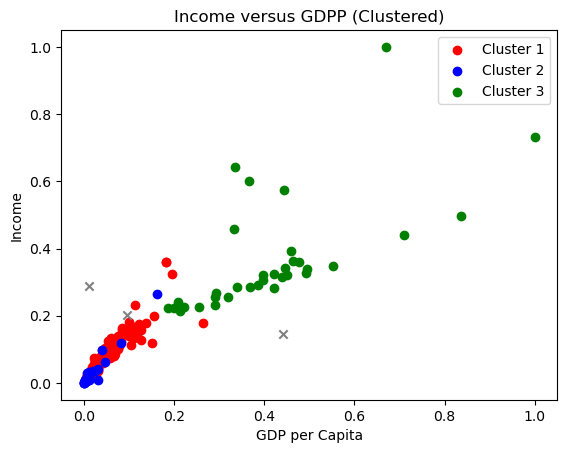

In [48]:
# Define colors for clusters
colours = 'rbgcmy'

# Visualisation of clusters: inflation vs gdpp
for c in range(kmeans.n_clusters):
    plt.scatter(
        x=df_scaled.loc[df_scaled['assigned_cluster'] == c, 'gdpp'],
        y=df_scaled.loc[df_scaled['assigned_cluster'] == c, 'income'],
        c=colours[c],
        label='Cluster {}'.format(c+1)
    )

    plt.scatter(
        kmeans.cluster_centers_[c, 0],
        kmeans.cluster_centers_[c, 1],
        marker='x',
        c='grey'
    )


plt.title("Income versus GDPP (Clustered)")
plt.xlabel("GDP per Capita")
plt.ylabel("Income")
plt.legend()

## Conclusions

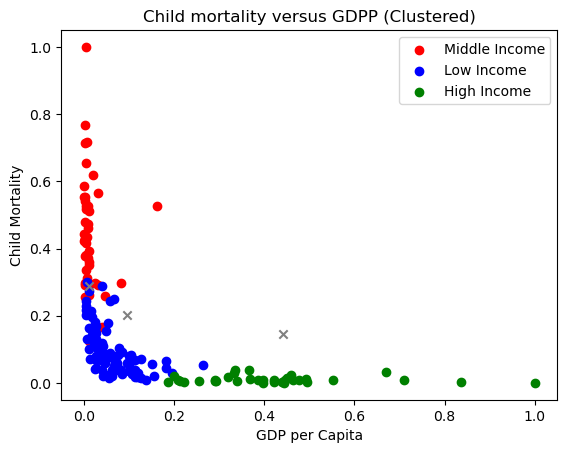

In [33]:
# Map cluster labels to income levels
income_levels = {
    1: 'Low Income',
    0: 'Middle Income',
    2: 'High Income',
}

# Visualisation of clusters: child mortality vs gdpp
for c in range(kmeans.n_clusters):
    plt.scatter(
        x = df_scaled.loc[df_scaled['assigned_cluster'] == c, 'gdpp'],
        y = df_scaled.loc[df_scaled['assigned_cluster'] == c, 'child_mort'],
        c=colours[c],
        label=income_levels[c]
        )

    plt.scatter(
        kmeans.cluster_centers_[c, 0], 
        kmeans.cluster_centers_[c, 1], 
        marker='x', 
        c = 'grey'
    )


plt.title("Child mortality versus GDPP (Clustered)")
plt.xlabel("GDP per Capita")
plt.ylabel("Child Mortality")
plt.legend()


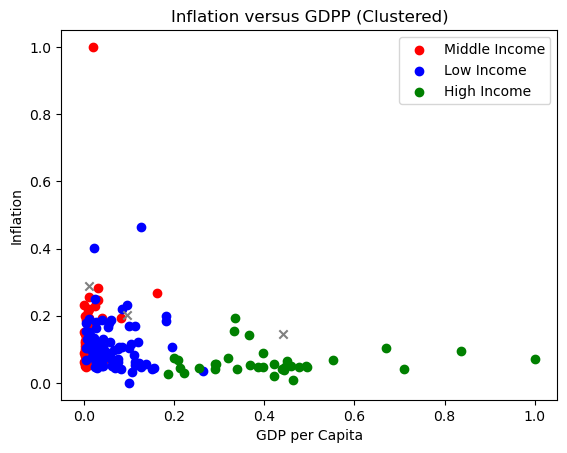

In [34]:

# Visualisation of clusters: inflation vs gdpp
for c in range(kmeans.n_clusters):
    plt.scatter(
        x = df_scaled.loc[df_scaled['assigned_cluster'] == c, 'gdpp'],
        y = df_scaled.loc[df_scaled['assigned_cluster'] == c, 'inflation'],
        c=colours[c],
        label=income_levels[c]
        )

    plt.scatter(
        kmeans.cluster_centers_[c, 0], 
        kmeans.cluster_centers_[c, 1], 
        marker='x', 
        c = 'grey'
    )


plt.title("Inflation versus GDPP (Clustered)")
plt.xlabel("GDP per Capita")
plt.ylabel("Inflation")
plt.legend()

#### Interpretation

There is no obvious clustering of groups for either the relationship between inflation and gdpp or child mortality and gdpp. We certainly see a few outliers in cluster two where there is high gdp per capita and low inflation rates for the country and vice versa indicating that perhaps there are no clear cluster groupings to be found. Returning to the pairplots, income and gdpp and total_fer rates and child_mortality have much stronger linear relationships and would likely form more organic clusters.

Nevertheless, exploring these two k-means cluster models, there is some indication that the clustering has grouped the datapoints along country income levels as observations (i.e. countries) with low GDP per category typically have higher child mortality rates. There is less of a relationship seen for the GDP per capita and inflation plot.